In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import dabl
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping


from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [3]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

# EDA

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.drop(['PassengerId', 'Name'], axis=1, inplace=True)

In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<AxesSubplot:xlabel='Survived', ylabel='count'>

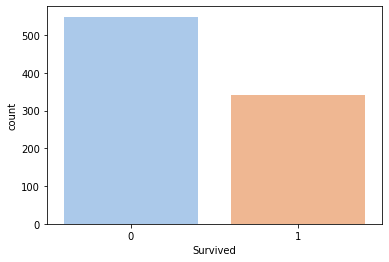

In [8]:
sns.countplot(x=train_df['Survived'], palette='pastel')

In [9]:
def make_countplot(train_df, col):
    sns.countplot(x=train_df['Survived'], palette='pastel', hue=train_df[col])
    plt.tight_layout(rect=(0, 0, 1.2, 1.2))
    plt.show()
#     plt.tight_layout(rect=(0, 0, 1.2, 1.2))
    return None

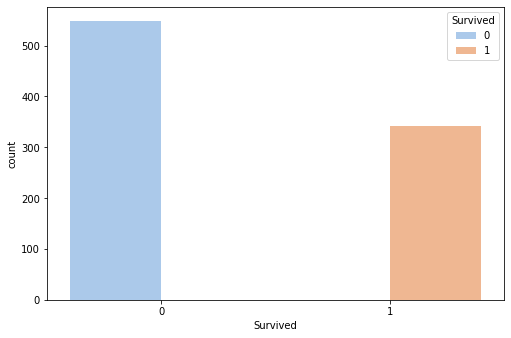

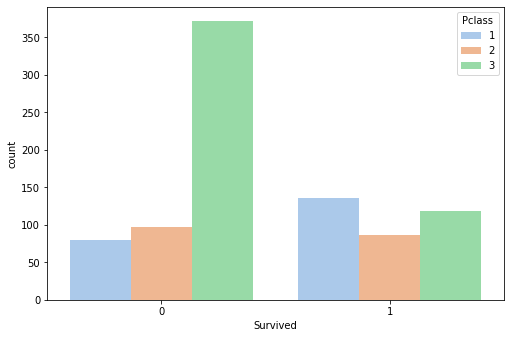

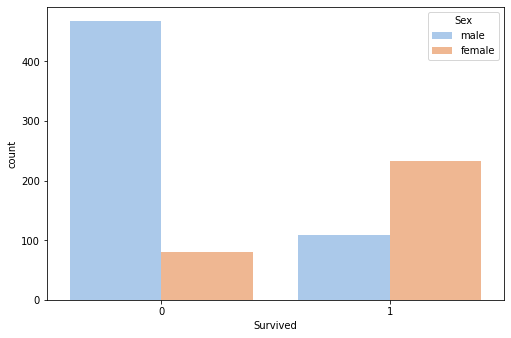

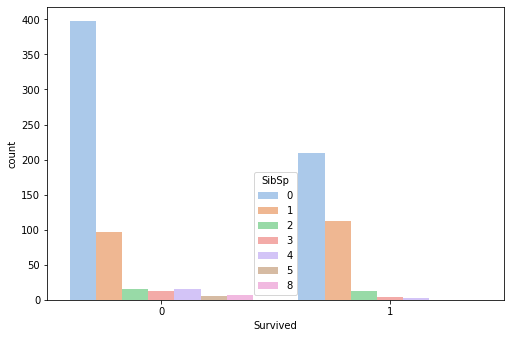

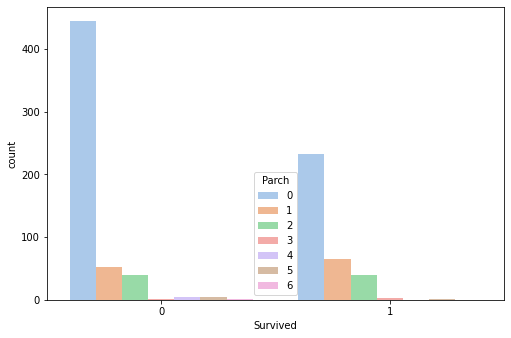

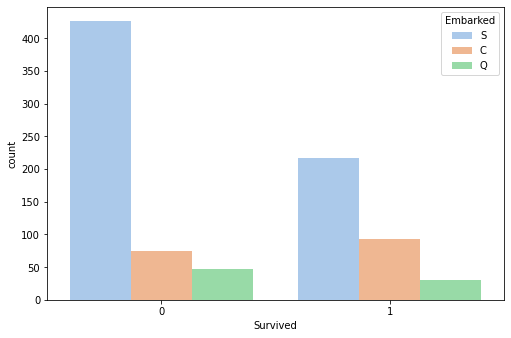

In [10]:
df = train_df.drop(['Age', 'Fare', 'Ticket', 'Cabin'], axis=1)
for col in df.columns:
    make_countplot(df, col)


In [11]:
df = train_df

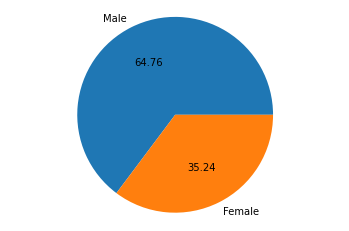

In [12]:
plt.pie(df['Sex'].value_counts(), labels=['Male', 'Female'], autopct='%.2f')
plt.axis('equal')
plt.show()

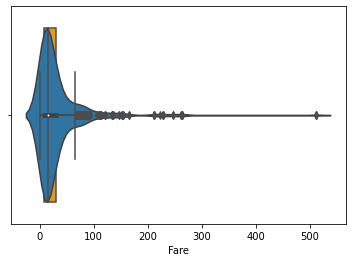

<AxesSubplot:xlabel='Fare', ylabel='Count'>

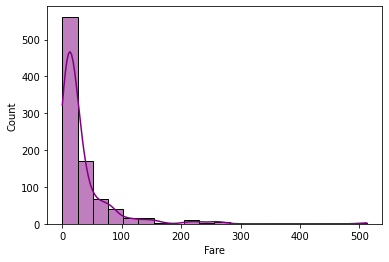

In [13]:
sns.violinplot(x=train_df['Fare'])
sns.boxplot(x=train_df['Fare'], color='orange')
plt.show()
sns.histplot(x=train_df['Fare'], bins=20, kde=True, color='purple')

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


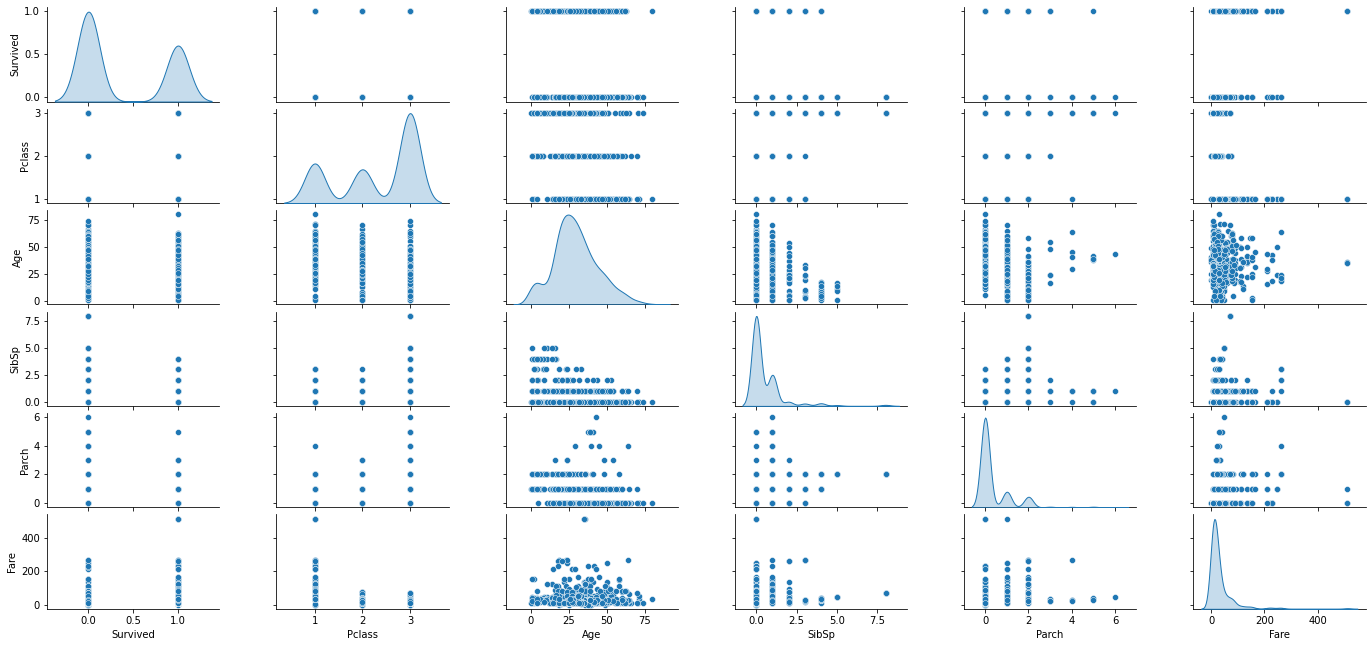

In [14]:
pp = sns.pairplot(df, size=1.8, aspect=1.8, diag_kind='kde', diag_kws=dict(shade=True))
fig = pp.fig
fig.subplots_adjust(top=0.83, wspace=0.33)

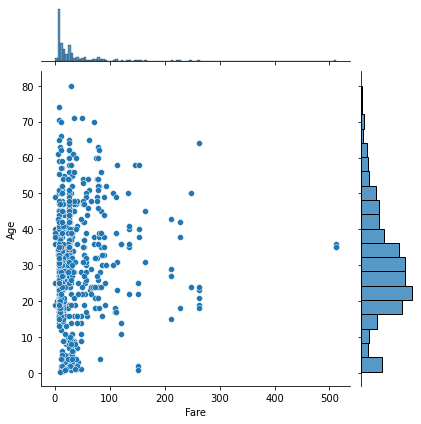

In [15]:
sns.jointplot(x=df['Fare'], y=df['Age'])

In [16]:
df[df['Fare'] > 200]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,0,1,male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,1,1,female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,0,1,male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,1,1,female,35.0,0,0,PC 17755,512.3292,NaN,C
299,1,1,female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,1,1,female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,1,1,female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,0,1,male,27.0,0,2,113503,211.5000,C82,C
380,1,1,female,42.0,0,0,PC 17757,227.5250,NaN,C
438,0,1,male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [17]:
idx = df[df['Fare'] > 500].index 
df.drop(idx, inplace=True)

In [18]:
idx = df[df['Age'] < 1].index
df.drop(idx, inplace=True)

In [19]:
# dabl.plot(df.drop('Survived', axis=1), df['Survived'])

### 0 -> did not survive
### 1 -> survived

# Imputation

In [20]:
df.isna().sum()[df.isna().sum() != 0]

Age         177
Cabin       680
Embarked      2
dtype: int64

In [21]:
df['Cabin'].value_counts().sum()

201

there are only 201 filled values in Cabin column, 686 values are NaN values

In [22]:
df.drop('Cabin', axis=1, inplace=True)

In [23]:
imputer = KNNImputer()
x = imputer.fit_transform(df[['Age']])
df['Age'] = x

In [24]:
# df = df.reset_index()

In [25]:
df['Embarked'].ffill(inplace=True)

In [26]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# Encoding categorical columns

In [27]:
df.select_dtypes(include='object').columns

Index(['Sex', 'Ticket', 'Embarked'], dtype='object')

In [28]:
print('Column "Sex" has ' + str(df['Sex'].nunique()) + ' unique values')
print('Column "Ticket" has ' + str(df['Ticket'].nunique()) + ' unique values')
print('Column "Embarked" has ' + str(df['Embarked'].nunique()) + ' unique values')

Column "Sex" has 2 unique values
Column "Ticket" has 679 unique values
Column "Embarked" has 3 unique values


In [29]:
df['Ticket'].value_counts()

347082      7
1601        7
CA. 2343    7
3101295     6
CA 2144     6
           ..
19988       1
2693        1
PC 17612    1
349233      1
370376      1
Name: Ticket, Length: 679, dtype: int64

In [30]:
df.drop('Ticket', axis=1, inplace=True)

In [31]:
df = pd.concat([pd.get_dummies(df['Sex']) , df.drop('Sex', axis=1)], axis=1)
df = pd.concat([pd.get_dummies(df['Embarked'], drop_first=True) , df.drop('Embarked', axis=1)], axis=1)

In [32]:
df.head()

,Q,S,female,male,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,1,0,3,22.0,1,0,7.2500
1,0,0,1,0,1,1,38.0,1,0,71.2833
2,0,1,1,0,1,3,26.0,0,0,7.9250
3,0,1,1,0,1,1,35.0,1,0,53.1000
4,0,1,0,1,0,3,35.0,0,0,8.0500


# Train-Test split of dataset

In [33]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [34]:
X.head()

,Q,S,female,male,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,1,3,22.0,1,0,7.2500
1,0,0,1,0,1,38.0,1,0,71.2833
2,0,1,1,0,3,26.0,0,0,7.9250
3,0,1,1,0,1,35.0,1,0,53.1000
4,0,1,0,1,3,35.0,0,0,8.0500


# Preparing Test data for submission

In [35]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [36]:
test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [37]:
test_df = pd.concat([pd.get_dummies(test_df['Sex']) , test_df.drop('Sex', axis=1)], axis=1)
test_df = pd.concat([pd.get_dummies(test_df['Embarked'], drop_first=True) , test_df.drop('Embarked', axis=1)], axis=1)

In [38]:
test_df.head()

,Q,S,female,male,Pclass,Age,SibSp,Parch,Fare
0,1,0,0,1,3,34.5,0,0,7.8292
1,0,1,1,0,3,47.0,1,0,7.0000
2,1,0,0,1,2,62.0,0,0,9.6875
3,0,1,0,1,3,27.0,0,0,8.6625
4,0,1,1,0,3,22.0,1,1,12.2875


# Create and Train ML model

In [39]:
xgb = XGBClassifier()
rf = RandomForestClassifier(max_depth= 6, n_estimators= 90)
knn = KNeighborsClassifier(n_neighbors=10)

In [40]:
def train_model(model, X, y):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"The model's score is: {score*100:.2f}%")
    print(classification_report(y_test, model.predict(X_test)))
    print(confusion_matrix(y_test, model.predict(X_test)))

In [41]:
train_model(xgb, X, y)

The model's score is: 84.21%
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        81
           1       0.80      0.79      0.80        52

    accuracy                           0.84       133
   macro avg       0.83      0.83      0.83       133
weighted avg       0.84      0.84      0.84       133

[[71 10]
 [11 41]]


In [42]:
train_model(rf, X, y)

The model's score is: 81.20%
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        81
           1       0.80      0.69      0.74        52

    accuracy                           0.81       133
   macro avg       0.81      0.79      0.80       133
weighted avg       0.81      0.81      0.81       133

[[72  9]
 [16 36]]


In [43]:
train_model(knn, X, y)

The model's score is: 72.93%
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        81
           1       0.75      0.46      0.57        52

    accuracy                           0.73       133
   macro avg       0.74      0.68      0.69       133
weighted avg       0.73      0.73      0.71       133

[[73  8]
 [28 24]]


In [44]:
print(f"Column names: {X.columns}")
xgb.feature_importances_

Column names: Index(['Q', 'S', 'female', 'male', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


array([0.01896387, 0.03447864, 0.56162596, 0.        , 0.23579177,
       0.03549081, 0.04532248, 0.02990145, 0.03842506], dtype=float32)

<AxesSubplot:xlabel='Survived', ylabel='male'>

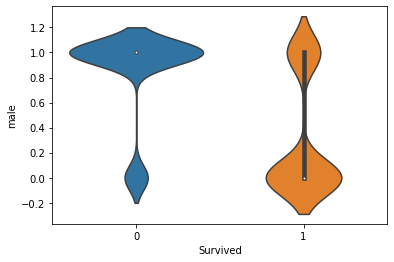

In [45]:
sns.violinplot(x=df['Survived'], y=df['male'])

# Clearly, Random Forest Classifier performed the best. So we will use this for our predictions

## DL model

In [46]:
# X_train.shape

In [47]:
# model = Sequential()

# model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(25, activation='relu'))
# model.add(Dense(1, activation='softmax'))

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model.summary()


In [48]:
# early_stop = EarlyStopping(patience=5, mode='min', monitor='val_loss')

In [49]:
# model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop], validation_data=(X_test, y_test))

In [50]:
# losses = pd.DataFrame(model.history.history)

In [51]:
# losses.plot()

In [52]:
# model.predict(X_test)

In [53]:
# _, accuracy = model.evaluate(X_test, y_test)
# print('Accuracy: %.2f' % (accuracy*100))

## Hyperparameter Tuning

In [54]:
kfold_split = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [55]:
kfold_split.split(X, y)

<generator object _BaseKFold.split at 0x7f17983fc1d0>

In [56]:
params = {
    'n_estimators': range(50, 100, 5),
    'max_depth': range(1, 25, 5)
}

In [57]:
gsearch = GridSearchCV(
    estimator=RandomForestClassifier(), 
    param_grid=params, 
    cv = kfold_split, 
    verbose = 1
)

In [58]:
gsearch.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 25, 5),
                         'n_estimators': range(50, 100, 5)},
             verbose=1)

In [59]:
(gsearch.best_params_, gsearch.best_score_)

({'max_depth': 11, 'n_estimators': 75}, 0.8381801801801801)

In [60]:
test_df.head()

,Q,S,female,male,Pclass,Age,SibSp,Parch,Fare
0,1,0,0,1,3,34.5,0,0,7.8292
1,0,1,1,0,3,47.0,1,0,7.0000
2,1,0,0,1,2,62.0,0,0,9.6875
3,0,1,0,1,3,27.0,0,0,8.6625
4,0,1,1,0,3,22.0,1,1,12.2875


In [61]:
predictions = xgb.predict(test_df)

In [62]:
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [63]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
